In [1]:
import MDAnalysis as md
from MDAnalysis import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MDAnalysis.analysis.leaflet import LeafletFinder, optimize_cutoff
from matplotlib.pyplot import figure
from MDAnalysis.analysis.rdf import InterRDF
import math
from scipy import stats

In [2]:
sim = md.Universe('npt_prod_1.gro', 'npt_prod_1-3.trr')
len(sim.trajectory)

3001

In [3]:
NP_CS = sim.select_atoms("name C18S and resname NP24")
NP_CF = sim.select_atoms("name C18F and resname NP24")
NP_NF = sim.select_atoms("name NF and resname NP24")
AP_CS = sim.select_atoms("name C18S and resname AP24")
AP_CF = sim.select_atoms("name C18F and resname AP24")
AP_NF = sim.select_atoms("name NF and resname AP24")

In [4]:
NP_angles=[];
AP_angles=[];
for ts in sim.trajectory:
    i = 1
    for a, b, c in zip(NP_CS.positions, NP_NF.positions, NP_CF.positions):
        ba = a - b
        bc = c - b
        cosine_angle = np.dot(ba,bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        ang = np.arccos(cosine_angle)
        NP_angles.append(( sim.trajectory.time, i, np.degrees(ang) ))
        i = i+1
        
    i = 1    
    for a, b, c in zip(AP_CS.positions, AP_NF.positions, AP_CF.positions):
        ba = a - b
        bc = c - b
        cosine_angle = np.dot(ba,bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        ang = np.arccos(cosine_angle)
        AP_angles.append(( sim.trajectory.time, i, np.degrees(ang) ))
        i = i+1

In [5]:
NP_angles = np.array(NP_angles)
NP = pd.DataFrame(dict(time=NP_angles[:,0], value=NP_angles[:,2], id=NP_angles[:,1], Ceramide='NP'))
AP_angles = np.array(AP_angles)
AP = pd.DataFrame(dict(time=AP_angles[:,0], value=AP_angles[:,2], id=AP_angles[:,1], Ceramide='AP'))

In [6]:
df = NP.append(AP)

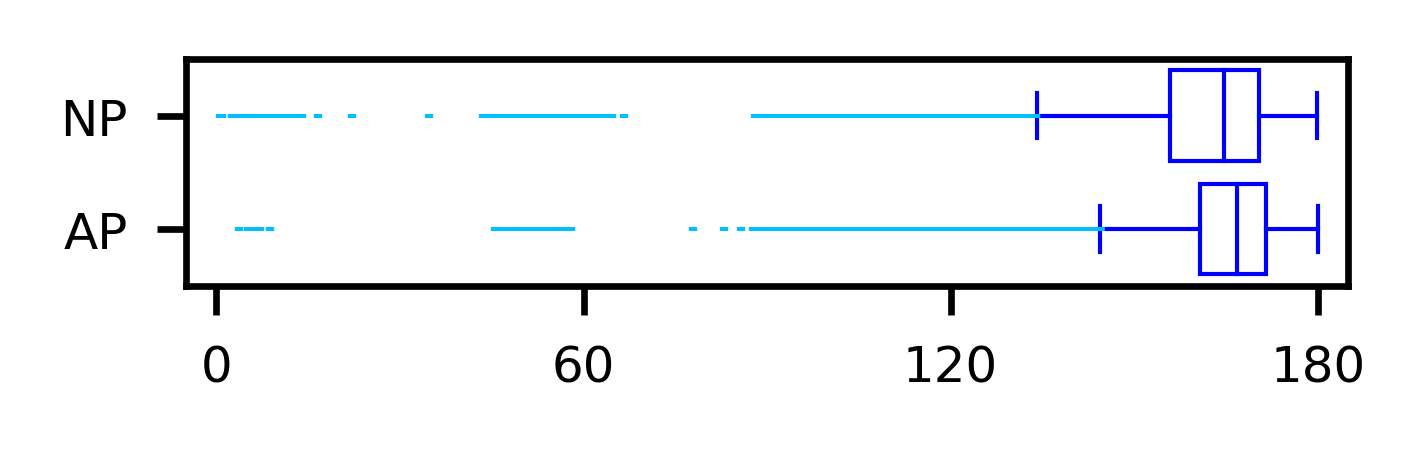

In [40]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
figure(num=None, figsize=(2.5,0.5), dpi=600)

#plt.boxplot(NP.value, AP.value)

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'blue'},
    'medianprops':{'color':'blue'},
    'whiskerprops':{'color':'blue'},
    'capprops':{'color':'blue'},
    'flierprops':{'markerfacecolor':'none','markeredgecolor':'deepskyblue', 'marker':'|', 'linewidth':'1.0'}
}

g = sns.boxplot(y="Ceramide", x="value", data=df,  linewidth=0.5, 
                fliersize=0.5, **PROPS)



plt.xlabel('')
plt.ylabel('')
plt.xticks((np.arange(0, 181, step=60)),fontsize=6)
plt.yticks(fontsize=6)
#plt.legend()
plt.xlim([-5, 185])

plt.savefig('cer-ext_angle.png',bbox_inches='tight')

In [31]:
AP.value.mean()

163.4067509704453

In [35]:
NP.value.mean()

155.48176414212273